In [212]:
#Librerias
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp , quad

In [213]:
def Euler_OrdenSuperior(f, t0, tf, Y0, h):                         #Definimos Euler
    '''
    Resuelve una ecuación diferencial de orden superior usando el método de Euler explícito.

    Parámetros:
    ----------
    f : callable
        Función que define el sistema de primer orden: f(t, Y) devuelve dY/dt.
        Se asume que Y contiene las derivadas [y, y', y'', ..., y^{(m-1)}].

    t0 : float
        Tiempo inicial.

    tf : float
        Tiempo final.

    Y0 : array_like
        Vector de condiciones iniciales. Ejemplo: [y0, y0', y0'', ..., y0^{(m-1)}].

    h : float
        Tamaño del paso de integración.

    Retorna:
    -------
    t : ndarray, shape (N,)
        Arreglo con los puntos de tiempo: t[0] = t0, t[1] = t0 + h, ..., t[-1] = tf.

    Yn : ndarray, shape (m, N)
        Matriz donde cada fila corresponde a una derivada:
        - Yn[0, :] ≈ y(t)
        - Yn[1, :] ≈ y'(t)
        - ...
        - Yn[m-1, :] ≈ y^{(m-1)}(t)
    '''

    # Número total de pasos de integración (nodos)
    nodos = int((tf - t0) / h)

    # Orden del sistema (dimensión del vector de estado Y)
    m = len(Y0)

    # Arreglo de tiempos con nodos+1 puntos
    t = np.zeros(nodos + 1)

    # Matriz para guardar las soluciones:
    # Cada fila es una derivada, cada columna es un instante de tiempo
    Yn = np.zeros((m, nodos + 1))

    # Condiciones iniciales
    t[0] = t0
    Yn[:, 0] = Y0

    # Iteración del método de Euler
    for k in range(nodos):
        t[k + 1] = t[k] + h                           # Paso en el tiempo
        Yn[:, k + 1] = Yn[:, k] + h * f(t[k], Yn[:, k])  # Paso de Euler

    return t, Yn
def RK2(f, t0, tf, Y0, h):                              #La funcion Runge-Kutta 2
    '''
    Método de Runge-Kutta de segundo orden (punto medio) para sistemas de EDOs.

    Parámetros:
    ----------
    f : callable
        Función que define el sistema de primer orden: f(t, Y) → dY/dt.
        Debe aceptar un escalar t y un vector Y con las derivadas [y, y', ..., y^{(m-1)}].

    t0 : float
        Tiempo inicial.

    tf : float
        Tiempo final.

    Y0 : array_like
        Vector de condiciones iniciales. Ejemplo: [y0, y0', ..., y0^{(m-1)}].

    h : float
        Tamaño del paso de integración.

    Retorna:
    -------
    t : ndarray, shape (N,)
        Vector de tiempos: t[0] = t0, ..., t[-1] = tf.

    Y : ndarray, shape (m, N)
        Matriz de soluciones. Cada fila representa una derivada:
        - Y[0, :] ≈ y(t)
        - Y[1, :] ≈ y'(t)
        - ...
        - Y[m-1, :] ≈ y^{(m-1)}(t)
    '''

    # Número total de pasos de integración
    nodos = int((tf - t0) / h)

    # Orden del sistema (longitud del vector Y0)
    m = len(Y0)

    # Inicialización del vector de tiempos
    t = np.zeros(nodos + 1)

    # Inicialización de la matriz solución:
    # filas: derivadas [y, y', ..., y^{(m-1)}]; columnas: instantes de tiempo
    Y = np.zeros((m, nodos + 1))

    # Asignar condiciones iniciales
    t[0] = t0        # Tiempo inicial
    Y[:, 0] = Y0     # Estado inicial (vector de derivadas)

    # Iteración principal del método de Runge-Kutta de segundo orden
    for k in range(nodos):
        t[k + 1] = t[k] + h  # Avanza el tiempo al siguiente paso

        # Primer estimador de pendiente: en el punto inicial
        k1 = f(t[k], Y[:, k])

        # Segundo estimador: evalúa en el punto medio con k1
        k2 = f(t[k] + h/2, Y[:, k] + h/2 * k1)

        # Actualización del estado con el segundo estimador (punto medio)
        Y[:, k + 1] = Y[:, k] + h * k2

    return t, Y
def RK4(f, t0, tf, Y0, h):                                         #La funcion Runge-Kutta 4

    """
    Realiza la integración de un sistema de EDO en el intervalo [t0, tf]
    usando el método de Runge–Kutta de orden 4.

    Entradas:
        f (callable): función f(t, y) que devuelve dy/dt como array de dimensión m.
        t0 (float): tiempo inicial.
        tf (float): tiempo final.
        Y0 (array_like): condición inicial y(t0), vector de dimensión m.
        h (float): paso de integración.

    Salidas:
        tn (ndarray): array de tiempos t₀, t₁, …, tₙ con paso h.
        Yn (ndarray): array de soluciones y[:, k] ≈ y(tₖ), forma (m, n+1).
    """
    n = int((tf - t0) / h)                     # número de pasos
    tn = np.zeros(n + 1, dtype=float)          # vector de tiempos t₀…tₙ
    m = len(Y0)                                # dimensión del sistema
    Yn = np.zeros((m, n + 1), dtype=float)     # matriz y[:,k] ≈ y(tₖ)

    tn[0]    = t0                              # tiempo inicial
    Yn[:, 0] = Y0                              # condición inicial y(t₀)

    for k in range(n):
        t_k = tn[k]                            # extraigo tₖ
        y_k = Yn[:, k]                         # extraigo yₖ

        # calculo de los cuatro estimadores
        k1 = h * f(t_k,           y_k)         # pendiente en el inicio
        k2 = h * f(t_k + h/2,     y_k + k1/2)  # pendiente a mitad con k1
        k3 = h * f(t_k + h/2,     y_k + k2/2)  # pendiente a mitad con k2
        k4 = h * f(t_k + h,       y_k + k3)    # pendiente al final

        # combinación de estimadores para yₖ₊₁
        Yn[:, k + 1] = y_k + (k1 + 2*k2 + 2*k3 + k4) / 6
        tn[k + 1]   = t_k + h                  # actualizar tiempo

    return tn, Yn                              # devolver tiempos y soluciones

# Laboratorio 07: Ecuaciones Diferenciales.

---
### Profesores: Juan Marcos Marín Ramírez, Daniel Ruiz Mejía
### Nombre: Orly de Jesus Rivera Cruz
*Métodos computacionales 2025-I*

---

# 1.

En una cadena de desintegración radiactiva, el elemento $A$ se desintegra en el elemento $B$, que a su vez se desintegra en $C$, y así sucesivamente hasta que la cadena de desintegración alcanza un elemento estable. Un ejemplo de tal cadena es $^{90}Sr$, que se desintegra en $^{90}Y$, que a su vez se desintegra a a $^{90}Zr$. La vida media de $^{90}Sr$ es de 28.78 años, y la vida media de $^{90}Y$ es de 2.67 días. $^{90}Zr$ es estable. Esta cadena de desintegración puede describirse mediante las siguientes ecuaciones diferenciales:

$$
\frac{dN_{Sr}}{dt} = -\lambda_{Sr}N_{Sr}
$$

$$
\frac{dN_{Y}}{dt} = -\lambda_{Y}N_{Y} - \frac{dN_{Sr}}{dt}
$$

Grafique la actividad relativa de una muestra de $^{90}Sr$ y otra gráfica de $^{90}Y$ en función del tiempo utlizando el método de Euler. (Una escala de tiempo logarítmica será útil).

**Nota:** Recuerde que $\lambda=\frac{\ln{2}}{t_{1/2}}$ con $t_{1/2}$ el tiempo de vida media.

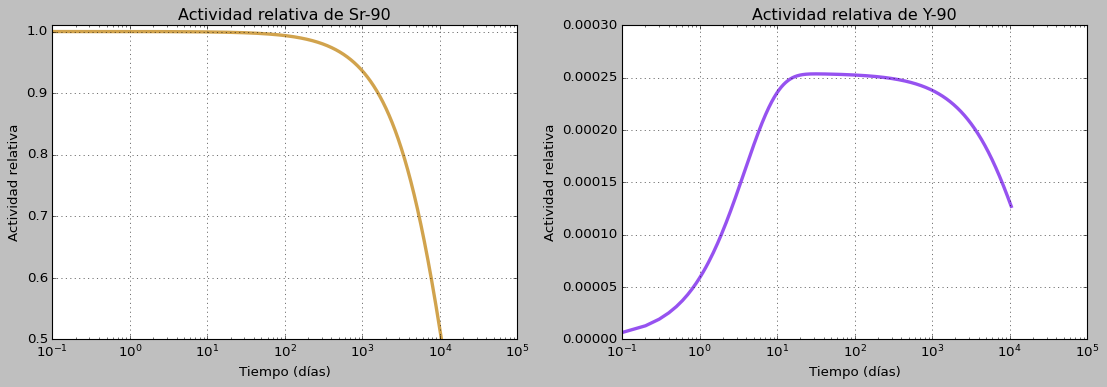

In [214]:
#Problema 1

tv_Sr = 28.78 * 365                                                 #Tiempos de vida media
tv_Y = 2.67

λ_Sr = np.log(2) / tv_Sr                                            #Lambdas
λ_Y = np.log(2) / tv_Y

#-------------------------------------------------------------------

def edo(t,Funciones):                                               #La ecuacion diferencial
    """
    Se realiza
    """
    N_Sr , N_Y = Funciones
    dN_Sr = -λ_Sr*N_Sr
    dN_Y = -λ_Y*N_Y - dN_Sr

    return np.array([dN_Sr , dN_Y])

h = 0.1                                                            #El paso para Euler
t = np.arange(0 , tv_Sr , h)

N0 = np.array([1,0])                                               #Condiciones iniciales

tn , yn = Euler_OrdenSuperior(edo , t[0] , t[-1] , N0 , h)         #Aplicamos Euler
#-------------------------------------------------------------------

plt.style.use("classic")                                           #Graficamos subplots para mayor comodidad

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].semilogx(tn, yn[0,:], c="#D1A34D", lw=3)

axs[0].set_title("Actividad relativa de Sr-90")
axs[0].set_xlabel("Tiempo (días)")
axs[0].set_ylabel("Actividad relativa")
axs[0].set_ylim(0.5, 1.01)

axs[0].grid()

axs[1].semilogx(tn, yn[1,:], c="#9652F0", lw=3)

axs[1].set_title("Actividad relativa de Y-90")
axs[1].set_xlabel("Tiempo (días)")
axs[1].set_ylabel("Actividad relativa")

axs[1].grid()

plt.tight_layout() 
plt.show()

# 2.

Este circuito actúa como un filtro pasabajas: envías una señal por la izquierda y sale alterada por la derecha.

<center>

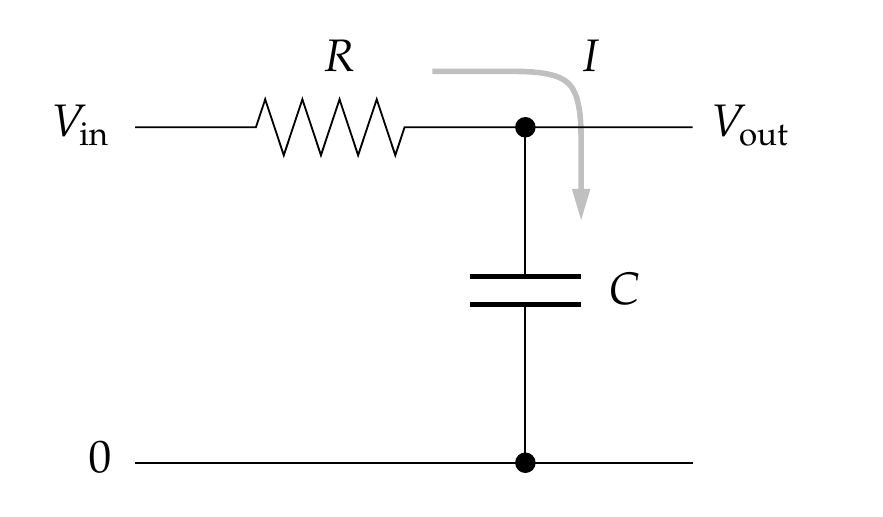

</center>

Usando la ley de Ohm y la ley del capacitor, y asumiendo que la impedancia de la carga de salida es muy alta, de modo que fluye una cantidad despreciable de corriente a través de ella, podemos escribir las ecuaciones que gobiernan este circuito de la siguiente manera. Sea $I$ la corriente que fluye a través de $R$ y hacia el capacitor, y sea $Q$ la carga en el capacitor. Entonces:

$$IR = V_{in} - V_{out}, \quad Q = CV_{out}, \quad I = \frac{dQ}{dt} $$

Sustituyendo la segunda ecuación en la tercera, y luego sustituyendo el resultado en la primera ecuación, encontramos que $ V_{\text{in}} - V_{\text{out}} = RC \left( \frac{dV_{\text{out}}}{dt} \right)$ , o equivalentemente

$$\frac{dV_{\text{out}}}{dt} = \frac{1}{RC} \left( V_{\text{in}} - V_{\text{out}} \right).$$

Escriba un programa para resolver esta ecuación para $V_{\text{out}}(t) $ usando el método de Runge-Kutta de cuarto orden cuando la señal de entrada es una onda cuadrada con frecuencia 1 y amplitud 1:

$$V_{\text{in}}(t) =
\begin{cases}
1 & \text{si } \lfloor 2t \rfloor \text{ es par}, \\
-1 & \text{si } \lfloor 2t \rfloor \text{ es impar},
\end{cases}$$

donde $\lfloor x \rfloor$ significa $x$ redondeado hacia abajo al siguiente entero más bajo. Grafique la salida del circuito filtro desde $t=0$ hasta $t=10$ cuando $RC=0.01, 0.1$ y $1$, con la condición inicial $V_{\text{out}}(0) = 0 $.

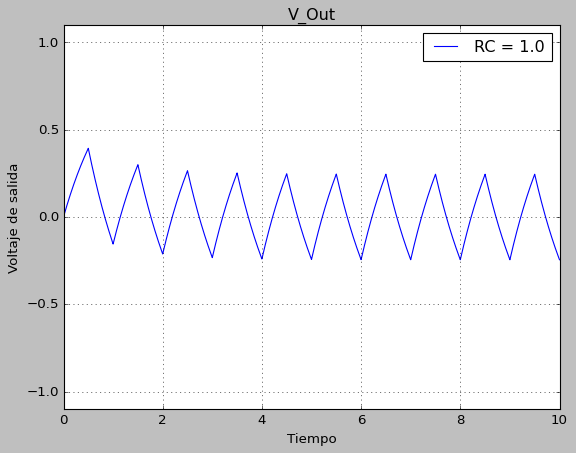

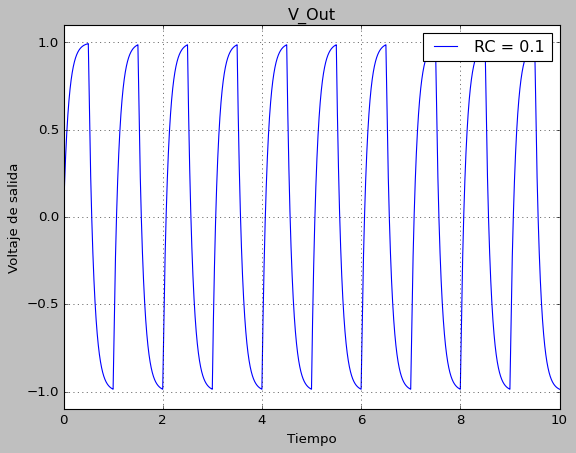

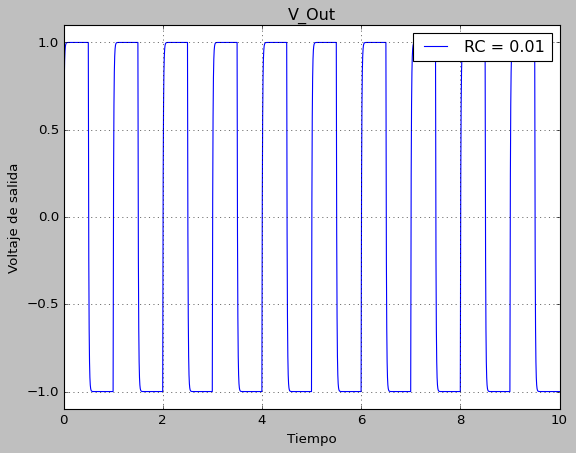

In [215]:
#Problema 2 

def V_in(t):                                                        #Definimos la funcion V_in 
    if ((2*t // 1) % 2) == 0:
        return 1
    else:
        return -1 

ti = 0                                                              #Condiciones para Runge-Kutta 4
tf = 10
V0 = np.array([0])
h = 1e-4


for RC in np.array([1.0 , 0.1 , 0.01]):                             #Vamos cambiando el RC con una iteracion

    def edo(t , V_out , RC = RC):                                   #Se define la EDO dependiendo el RC
        return (1/RC) * (V_in(t) - V_out)
    
    tn , yn = RK4(edo , ti ,tf , V0 , h)                            #Se ejecuta Runge-Kutta 4

    plt.title("V_Out")                                              #Se grafica
    plt.xlabel("Tiempo")
    plt.ylabel("Voltaje de salida")
    plt.ylim(-1.1 , 1.1)
    plt.plot(tn , yn[0,:] , label=f"RC = {RC}")
    plt.legend()
    plt.grid()
    plt.show()

# 3.

La ecuación logística es un modelo de ecuación diferencial simple que se puede utilizar para relacionar el cambio en la población $\frac{dP}{dt}$ con la población actual, $P$, dada una tasa de crecimiento, $r$, y una capacidad de carga, $K$. La ecuación logística se puede expresar como

$$
\frac{dP}{dt} = rP \left( 1 - \frac{P}{K} \right).
$$

Escriba una función `my_logistic_eq(t, P, r, K)` que represente la ecuación logística con un retorno de `dP`. Tenga en cuenta que este formato permite que `my_logistic_eq` se utilice como un argumento de entrada para `solve_ivp`. Suponga que los argumentos `dP`, `t`, `P`, `r` y `K` son todos escalares, y `dP` es el valor $\frac{dP}{dt}$ dado $r$, $P$ y $K$.
Tenga en cuenta que la ecuación logística tiene una solución analítica definida por

$$
P(t) = \frac{K P_0 e^{rt}}{K + P_0 (e^{rt} - 1)}
$$
donde $P_0$ es la población inicial.

- Grafique $P$ vs $t$ utilizando el método de Euler y de RK4, comparando con la solución analítica.
- Calcule el error relativo de ambas soluciones, considerando la solución analítica como referencia

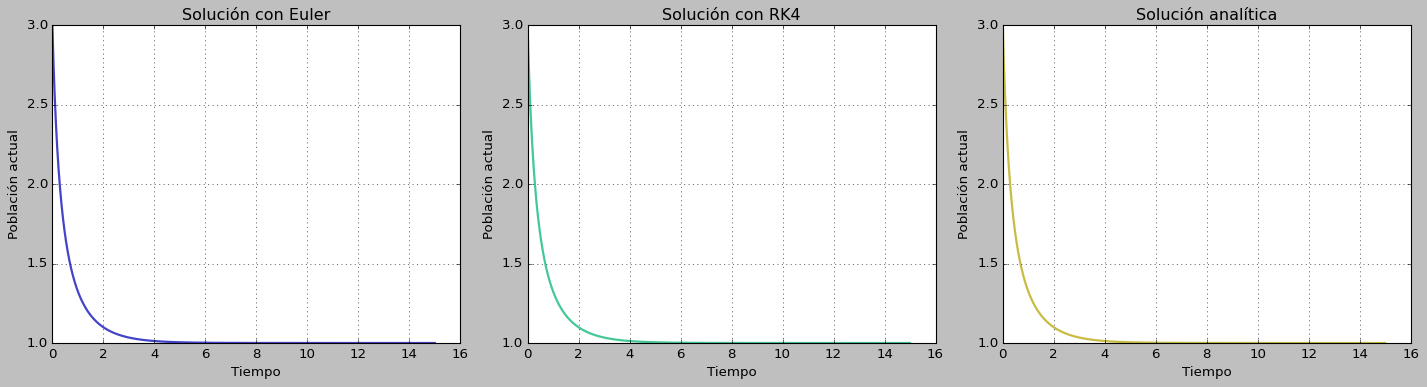

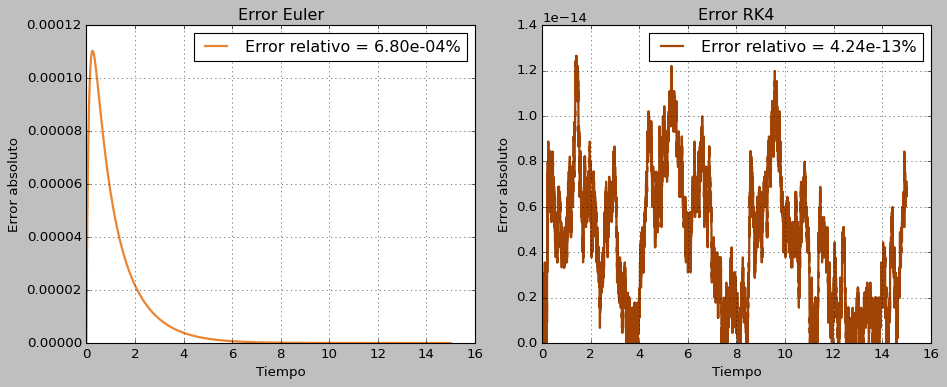

In [216]:
#Problema 3

Kp = 1                                                                      #Se fijan los parametros iniciales
rp = 1
P0 = np.array([3.0])                                                        #Valor inicial
h = 1e-4                                                                    #Salto

t = np.arange(0,15+h,h)

def my_logistic_eq(t, P, r = rp, K = Kp):                                   #Se define el EDO
    return r*P * (1 - (P/K))

def sol_an(t, P0 = P0[0], r = rp, K = Kp):                                  #Se define la ecuacion analitica
    return (K*P0*np.exp(r*t)) / (K + P0*(np.exp(r*t) - 1))

tne , yne = Euler_OrdenSuperior(my_logistic_eq , t[0] , t[-1] , P0 , h)     #Resolvemos con Euler y RK4
tnr , ynr = RK4(my_logistic_eq , t[0] , t[-1] , P0 , h)

#----------------------------------------------------------------------------------------------------

fig, axs = plt.subplots(1, 3, figsize=(18, 5))                              #Graficamos las 3 soluciones

axs[0].plot(tne, yne[0,:], c="#4444C9", lw=2)
axs[0].set_title("Solución con Euler")
axs[0].set_xlabel("Tiempo")
axs[0].set_ylabel("Población actual")
axs[0].grid()

axs[1].plot(tnr, ynr[0,:], c="#44C996", lw=2)
axs[1].set_title("Solución con RK4")
axs[1].set_xlabel("Tiempo")
axs[1].set_ylabel("Población actual")
axs[1].grid()

axs[2].plot(t, sol_an(t), c="#C9BC44", lw=2)
axs[2].set_title("Solución analítica")
axs[2].set_xlabel("Tiempo")
axs[2].set_ylabel("Población actual")
axs[2].grid()

plt.tight_layout()
plt.show()
#-------------------------------------

error_euler = 100 * np.mean(np.abs(sol_an(t) - yne[0,:]) / np.abs(sol_an(t)))       #Encotnramos los errores relativos
error_RK4 = 100 * np.mean(np.abs(sol_an(t) - ynr[0,:]) / np.abs(sol_an(t)))

#----------------------------------------------------------------------------------------------
fig, axs = plt.subplots(1, 2, figsize=(12, 5))                                      #Graficamos los errores absolutos imprimiendo los relativos

axs[0].plot(t, abs(sol_an(t) - yne[0,:]), c="#E98533", lw=2 , label=f"Error relativo = {error_euler:.2e}%")
axs[0].set_title("Error Euler")
axs[0].set_xlabel("Tiempo")
axs[0].set_ylabel("Error absoluto")
axs[0].legend()
axs[0].grid()

axs[1].plot(t, abs(sol_an(t) - ynr[0,:]), c="#A04305", lw=2 , label=f"Error relativo = {error_RK4:.2e}%")
axs[1].set_title("Error RK4")
axs[1].set_xlabel("Tiempo")
axs[1].set_ylabel("Error absoluto")
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

#-----------------------------------------------------------------------------------------------



# 4.
Considera la ecuación de movimiento para el desplazamiento angular $u$ de un péndulo rígido no lineal de longitud $l$ (donde $g$ es la aceleración gravitacional):

$$
\ddot{u}= -\frac{g}{l} \sin u,
$$

con las condiciones iniciales:

$$
u(0) = u_0, \quad \dot{u}(0) = 0.
$$

El período de oscilaciones de amplitud arbitraria depende explícitamente del desplazamiento inicial $u_0 \in [-\pi, \pi]$:

$$
T = T_0 \frac{2}{\pi} K \left( \alpha \right).
$$

con
$$
T_0=2 \pi \sqrt{\frac{l}{g}}
$$

$$
\alpha=\sin^2 \frac{u_0}{2}
$$

$$
K(\alpha)=\int_0^1 \frac{dz}{\sqrt{(1-z^2)(1-\alpha z^2)}}.
$$

- Halle la solución $u(t)$ utilizando el método de Runge Kutta con $h=0.001$ y distintos valores de $u_0=1$ y $u_0=\pi/2$.
- Grafique $T/T_0$ en función de $u_0$ y compare con el resultado analítico.

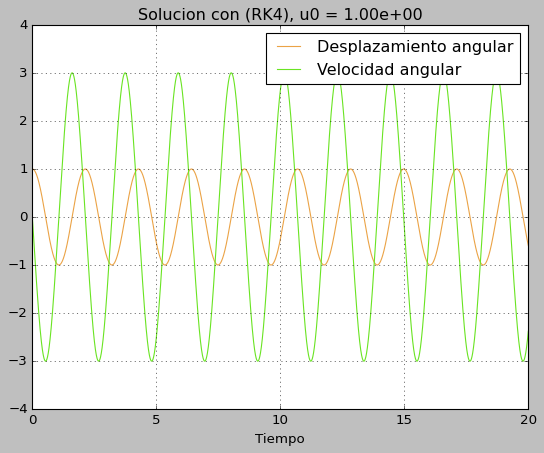

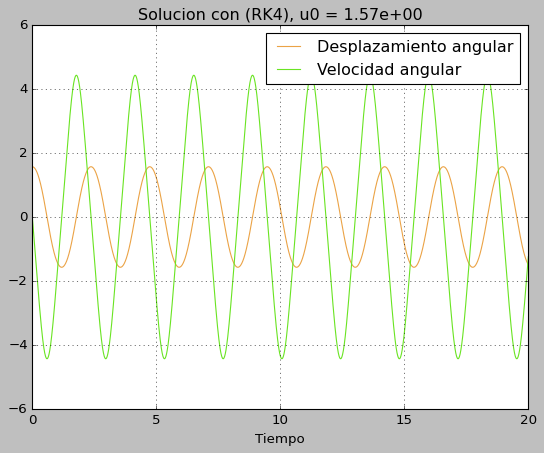

Como podemos darnos cuenta la manera computacional se acerca muchisimo a la analitica


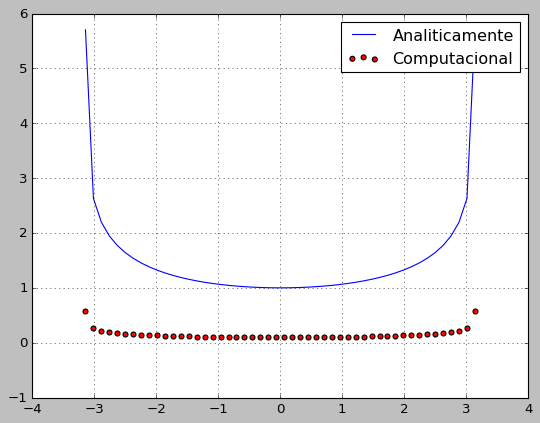

In [217]:
#Problema 4

g=9.81
l = 1.0

def edo(t , Funciones):                                     #Definimos el EDO
    u1 , u2 = Funciones
    du1 = u2
    du2 = -(g/l)*np.sin(u1)
    return np.array([du1 , du2])

t = np.arange(0 , 20+h , h) 
h = 0.001                                                    #Saltos

for u0 in [1 , np.pi/2]:                                    #Iteramos para distintos valores de u0

    U0 = np.array([u0 , 0])                                 #Condiciones iniciales
    tn , yn = RK4(edo , t[0] , t[-1] , U0 , h)              #Aplicamos Runge-Kutta 4

    plt.title(f"Solucion con (RK4), u0 = {u0:.2e}")                      #Graficamos la solución
    plt.xlabel("Tiempo")
    plt.plot(tn , yn[0,:] , c="#EBA346" , label="Desplazamiento angular")
    plt.plot(tn , yn[1,:] , c="#6AE423", label="Velocidad angular")
    plt.legend()
    plt.grid()
    plt.show()

#------------------------------------------------------------------------------------------------


u0 = np.linspace( -np.pi + 1e-3 , np.pi - 1e-3, 50)             
T_T0 = np.zeros_like(u0)                                    #Manera analitica
T = np.zeros_like(u0)                                       #Manera computacional

for i,n in enumerate(u0):                                   #Calculamos computacionalmente con RK4
    U0 = np.array([n , 0])                                  #Condiciones iniciales
    tn , yn = RK4(edo , t[0] , t[-1] , U0 , h)              #Aplicamos Runge-Kutta 4

    v = yn[1,:]                                             

    Ca = np.where(np.diff(np.sign(v)) < 0)[0]               #Calculamos cuando hay cambio de signo

    tm = t[Ca]

    T_c = np.diff(tm)  
    T[i] = np.mean(T_c) 

for i,n in enumerate(u0):                                   #Calculamos analiticamente con quad
    a = (np.sin(n/2))**2
    f = lambda z : 1 / np.sqrt(( (1 - z**2) * (1 - a*(z**2)) ))
    K , _ = quad(f,0, 1 - 1e-10)
    T_T0[i] = (2*K)/np.pi

T0 = 2*np.pi * np.sqrt(l/g)

plt.plot(u0 , T_T0 , label="Analiticamente")
plt.scatter(u0 , T/T0 , c="red" , label="Computacional")

print("Como podemos darnos cuenta la manera computacional se acerca muchisimo a la analitica")
plt.legend()
plt.grid()
plt.show()

# 5.

Considere un sistema ecológico aislado donde habitan dos especies: conejos ($x$) y zorros ($y$). La dinámica poblacional de ambas especies se describe mediante el siguiente sistema de ecuaciones diferenciales:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\gamma y + \delta xy$$

Donde:
- $x(t)$ representa la población de conejos en el tiempo t
- $y(t)$ representa la población de zorros en el tiempo t
- $\alpha$ = 0.8 (tasa de reproducción de los conejos)
- $\beta$ = 0.04 (tasa de depredación de conejos por zorros)
- $\gamma$ = 0.3 (tasa de mortalidad natural de los zorros)
- $\delta$ = 0.01 (eficiencia de conversión de presas consumidas en nuevos depredadores)

Condiciones iniciales:
- $x(0)$ = 50 (población inicial de conejos)
- $y(0)$ = 20 (población inicial de zorros)


**a)** Implemente el método de Euler para resolver este sistema con un paso temporal de $h$ = 0.1, simulando la evolución del sistema durante 50 unidades de tiempo.

**b)** Implemente el método de Runge-Kutta de segundo y cuarto orden para resolver el mismo sistema con idénticos parámetros.

**c)** Compare los resultados de Euler y RK4 mediante:
   - Gráficas de la evolución temporal de ambas poblaciones
   - Diagrama de fase ($x$ vs $y$)
   - Cálculo del error relativo entre ambas soluciones, considerando RK4 como referencia

**d)** Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal ($h$ = 0.5, $h$ = 0.05). ¿Qué observa? Explique por qué ocurre.

**e)** Investigue cómo las variaciones en los parámetros $\alpha$, $\beta$, $\gamma$ y $\delta$ afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.

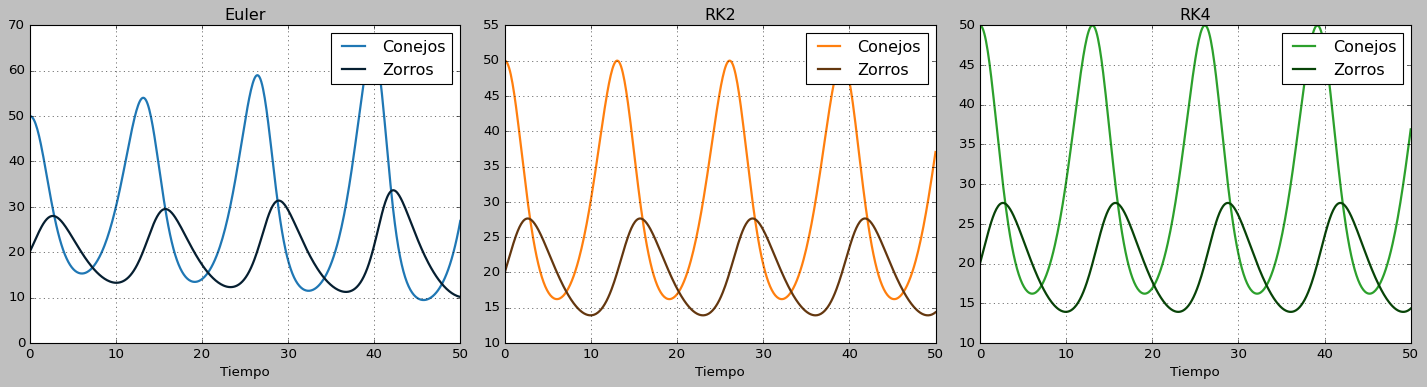

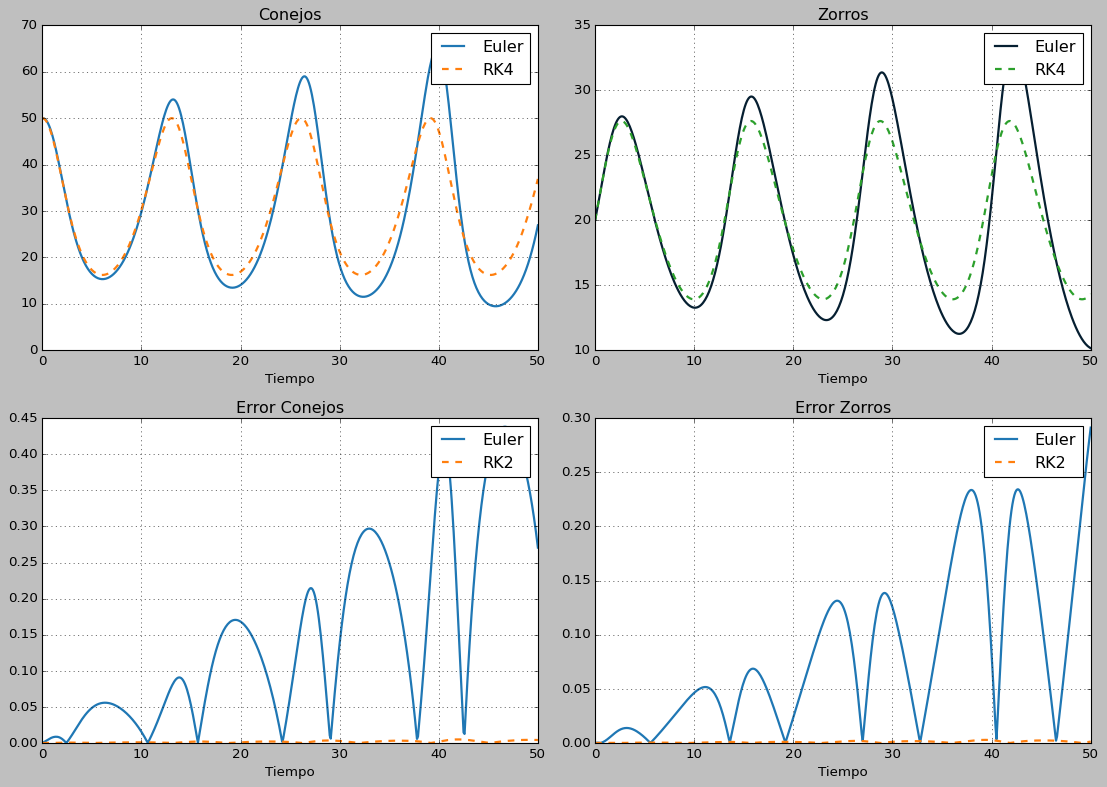

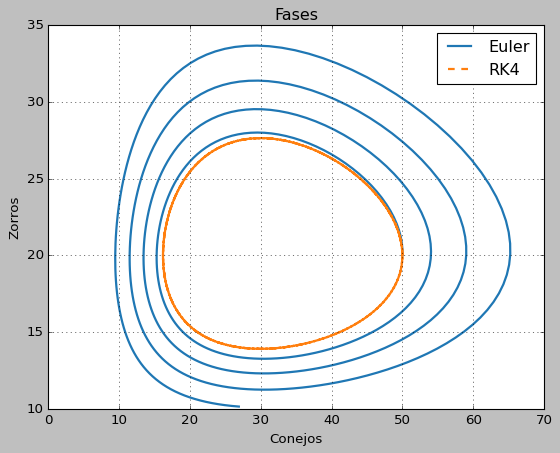

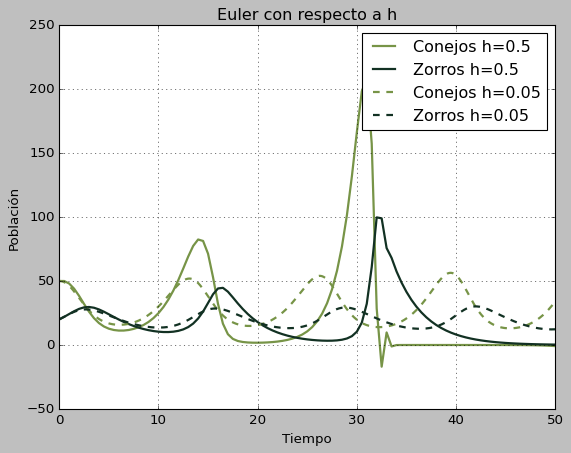

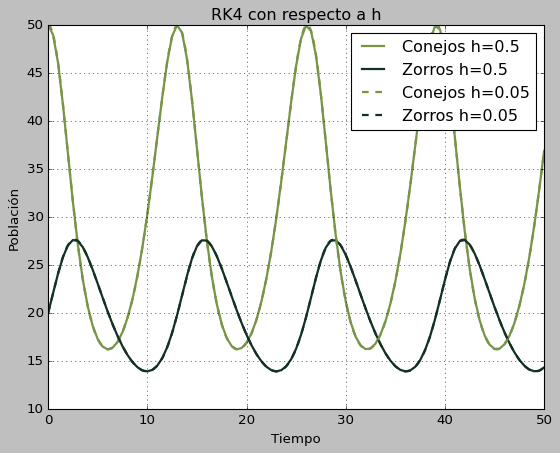

Como nos podemos dar cuenta el metodo de euler presenta mucha menos presicion con un h mas pequeño, y cuando se incrementa este ya se estabiliza un poco mas, esto porque su convergencia es pequeña encomparacion con KR4 que con un h pequeña ya da resultados estables,de hecho el cambio entre 0.5 a 0.05 no se nota.


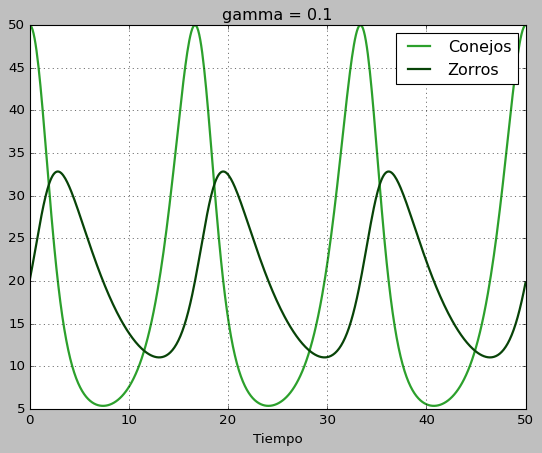

En este caso la poblacion de zorros aumenta por lo que los conejos disminuyen mas


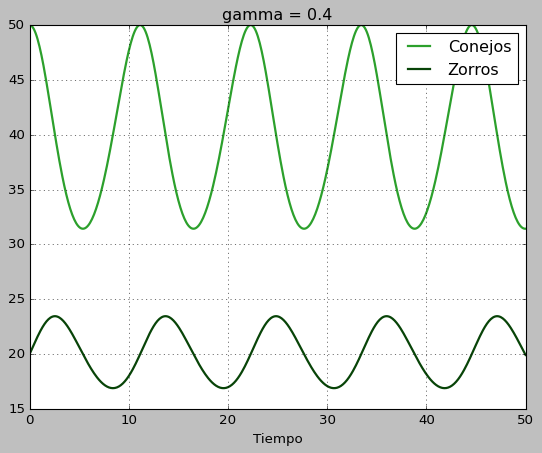

En este caso la poblacion de zorros disminuye y la de conejos por ende aumenta


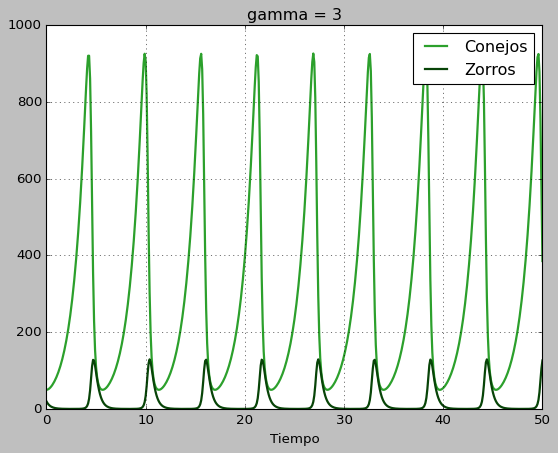

Cuando lo aumentamos mucho los zorros disminuyen mucho mas haciendo que los conejos prosperen, por lo que podemso afirmar que gamma controla la poblacion de zorros


In [218]:
#Problema 5

alpha = 0.8                                                                 #Parametros
beta = 0.04 
gamma = 0.3
delta = 0.01

x0 = 50                                                                     #Datos iniciales
y0 = 20

h = 0.1                                                                     #El salto
t = np.arange(0,50+h,h)

def edo(t , Funciones):                                                     #La funcion EDO
    x , y = Funciones
    dxdt = alpha*x -beta*x*y
    dydt = -gamma*y + delta*x*y
    return np.array([dxdt , dydt])

T0 = np.array([x0,y0])                                                      

tn_e   , yn_e   = Euler_OrdenSuperior(edo , t[0] , t[-1] , T0 , h)         #Aplicamos Euler
tn_RK2 , yn_RK2 = RK2(edo , t[0] , t[-1] , T0 , h)                       #Aplicamos RK2
tn_RK4 , yn_RK4 = RK4(edo , t[0] , t[-1] , T0 , h)                          #Aplicamos RK4

#------------------------------------------------------------------------------------------------------

fig, axes = plt.subplots(1, 3, figsize=(18,5))

axes[0].plot(tn_e, yn_e[0,:], c="#1f77b4", lw=2 , label="Conejos")      #Graficamos todos los 3 metodos
axes[0].plot(tn_e, yn_e[1,:], c="#061f31", lw=2 , label="Zorros")
axes[0].set_title("Euler")
axes[0].set_xlabel("Tiempo")
axes[0].legend()
axes[0].grid()

axes[1].plot(tn_RK2, yn_RK2[0,:], c="#ff7f0e", lw=2 , label="Conejos")
axes[1].plot(tn_RK2, yn_RK2[1,:], c="#64370f", lw=2 , label="Zorros")
axes[1].set_title("RK2")
axes[1].set_xlabel("Tiempo")
axes[1].legend()
axes[1].grid()

axes[2].plot(tn_RK4, yn_RK4[0,:], c="#2ca02c", lw=2 , label="Conejos")
axes[2].plot(tn_RK4, yn_RK4[1,:], c="#084408", lw=2 , label="Zorros")
axes[2].set_title("RK4")
axes[2].set_xlabel("Tiempo")
axes[2].legend()
axes[2].grid()

plt.tight_layout()
plt.show()

#------------------------------------------------------------------------------------------

fig, axes = plt.subplots(2, 2, figsize=(14,10))                                         #Comparamos a euler con RK4

axes[0,0].plot(tn_e, yn_e[0,:], c="#1f77b4", lw=2, label="Euler")
axes[0,0].plot(tn_RK4, yn_RK4[0,:], c="#ff7f0e", lw=2,ls="--", label="RK4")
axes[0,0].set_title("Conejos")
axes[0,0].set_xlabel("Tiempo")
axes[0,0].legend()
axes[0,0].grid()

axes[0,1].plot(tn_e, yn_e[1,:], c="#061f31", lw=2, label="Euler")
axes[0,1].plot(tn_RK4, yn_RK4[1,:], c="#2ca02c", lw=2,ls="--", label="RK4")
axes[0,1].set_title("Zorros")
axes[0,1].set_xlabel("Tiempo")
axes[0,1].legend()
axes[0,1].grid()

error_euler = np.abs(yn_e - yn_RK4) / np.abs(yn_RK4)                                    #Miramos su error tomando a RK4 como el valor real
error_RK2   = np.abs(yn_RK2 - yn_RK4) / np.abs(yn_RK4)

axes[1,0].plot(tn_e, error_euler[0,:], c="#1f77b4", lw=2, label="Euler")
axes[1,0].plot(tn_RK2, error_RK2[0,:], c="#ff7f0e", lw=2,ls="--", label="RK2")
axes[1,0].set_title("Error Conejos")
axes[1,0].set_xlabel("Tiempo")
axes[1,0].legend()
axes[1,0].grid()

# Error relativo Zorros
axes[1,1].plot(tn_e, error_euler[1,:], c="#1f77b4", lw=2, label="Euler")
axes[1,1].plot(tn_RK2, error_RK2[1,:], c="#ff7f0e", lw=2,ls="--", label="RK2")
axes[1,1].set_title("Error Zorros")
axes[1,1].set_xlabel("Tiempo")
axes[1,1].legend()
axes[1,1].grid()


plt.tight_layout()
plt.show()

plt.plot(yn_e[0,:], yn_e[1,:], c="#1f77b4", lw=2, label="Euler")                            #Graficamos las fases de nuestras funciones
plt.plot(yn_RK4[0,:], yn_RK4[1,:], c="#ff7f0e", lw=2,ls="--", label="RK4")
plt.title("Fases")
plt.xlabel("Conejos")
plt.ylabel("Zorros")
plt.legend()
plt.grid()
plt.show()

#--------------------------------------------------------------------------

h = 0.5                                                                             #Vemos como cambia euler con respecto a h ya que tiene convergencia baja

t = np.arange(0, 50+h, h)
tn_e, yn_e = Euler_OrdenSuperior(edo , t[0], t[-1], T0, h)
plt.plot(tn_e, yn_e[0,:], lw=2,color = "#779447", label=f"Conejos h={h}")
plt.plot(tn_e, yn_e[1,:], lw=2,color = "#123123",label=f"Zorros h={h}")

h = 0.05

t = np.arange(0, 50+h, h)
tn_e, yn_e = Euler_OrdenSuperior(edo , t[0], t[-1], T0, h)
plt.plot(tn_e, yn_e[0,:], lw=2,color = "#779447",ls = "--", label=f"Conejos h={h}")
plt.plot(tn_e, yn_e[1,:], lw=2,color = "#123123",ls = "--",label=f"Zorros h={h}")


plt.title("Euler con respecto a h")
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.legend()
plt.grid()
plt.show()

h = 0.5

t = np.arange(0, 50+h, h)                                                                       #Vemos en cambio como RK4 casi n ocambia porque su convergencia es alta
tn_RK4, yn_RK4 = RK4(edo , t[0], t[-1], T0, h)
plt.plot(tn_RK4, yn_RK4[0,:], lw=2,color = "#779447", label=f"Conejos h={h}")
plt.plot(tn_RK4, yn_RK4[1,:], lw=2,color = "#123123",label=f"Zorros h={h}")

h = 0.05

t = np.arange(0, 50+h, h)
tn_RK4, yn_RK4 = RK4(edo , t[0], t[-1], T0, h)
plt.plot(tn_RK4, yn_RK4[0,:], lw=2,color = "#779447",ls = "--", label=f"Conejos h={h}")
plt.plot(tn_RK4, yn_RK4[1,:], lw=2,color = "#123123",ls = "--",label=f"Zorros h={h}")

plt.title("RK4 con respecto a h")
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.legend()
plt.grid()
plt.show()

print("Como nos podemos dar cuenta el metodo de euler presenta" \
" mucha menos presicion con un h mas pequeño, y cuando se incrementa este " \
"ya se estabiliza un poco mas, esto porque su convergencia es pequeña en" \
"comparacion con KR4 que con un h pequeña ya da resultados estables," \
"de hecho el cambio entre 0.5 a 0.05 no se nota.")
#------------------------------------------------------------------------------------

gamma = 0.2 #<------------ Hacemos el cambio de 0.3 a 0.2                           #Aqui solo cambiamos el parametro gamma para descubrir que controla

h = 0.1
t = np.arange(0,50+h,h)

tn_RK4 , yn_RK4 = RK4(edo , t[0] , t[-1] , T0 , h)         #Aplicamos RK4

plt.plot(tn_RK4, yn_RK4[0,:], c="#2ca02c", lw=2 , label="Conejos")
plt.plot(tn_RK4, yn_RK4[1,:], c="#084408", lw=2 , label="Zorros")

plt.title("gamma = 0.1")
plt.xlabel("Tiempo")
plt.legend()
plt.grid()
plt.show()
print("En este caso la poblacion de zorros aumenta por lo que los conejos disminuyen mas")

gamma = 0.4 #<------------ Hacemos el cambio de 0.3 a 0.4

tn_RK4 , yn_RK4 = RK4(edo , t[0] , t[-1] , T0 , h)         #Aplicamos RK4

plt.plot(tn_RK4, yn_RK4[0,:], c="#2ca02c", lw=2 , label="Conejos")
plt.plot(tn_RK4, yn_RK4[1,:], c="#084408", lw=2 , label="Zorros")
plt.title("gamma = 0.4")
plt.xlabel("Tiempo")
plt.legend()
plt.grid()
plt.show()
print("En este caso la poblacion de zorros disminuye y la de conejos por ende aumenta")

gamma = 3 #<------------ Hacemos el cambio de 0.3 a 3

tn_RK4 , yn_RK4 = RK4(edo , t[0] , t[-1] , T0 , h)         #Aplicamos RK4

plt.plot(tn_RK4, yn_RK4[0,:], c="#2ca02c", lw=2 , label="Conejos")
plt.plot(tn_RK4, yn_RK4[1,:], c="#084408", lw=2 , label="Zorros")
plt.title("gamma = 3")
plt.xlabel("Tiempo")
plt.legend()
plt.grid()
plt.show()
print("Cuando lo aumentamos mucho los zorros disminuyen mucho mas haciendo que los conejos prosperen, por lo que podemso afirmar que gamma controla la poblacion de zorros")

# 6.

El oscilador armónico forzado amortiguado está dado por la siguiente ecuación:

$$\frac{d^{2}x}{dt^{2}} + \gamma \frac{dx}{dt} + \omega_{0}^{2} x = \frac{F}{m},$$

donde $\gamma$ es la constante de amortiguamiento, $\omega_{0} = \sqrt{k/m}$ es la frecuencia angular natural, $m$ es la masa y $F$ es la fuerza impulsora. Esta ecuación de segundo orden también puede escribirse con dos ecuaciones de primer orden:

$$
\frac{dx}{dt} = v
$$

$$
\frac{dv}{dt} = \frac{F}{m} - \gamma v - \omega_{0}^{2} x
$$

que es la forma que usaremos para la integración numérica.

La energía del oscilador armónico es:

$$
E = \frac{1}{2} m v^{2} + \frac{1}{2} k x^{2},
$$

Considere $x(0)=0$ y $v(0)=1$. Grafique $x(t)$ y $E(t)$ para los siguientes casos:

- $F=0$ y para $\gamma=[0,0.05,0.3]$.
- $\gamma=0$, $F=F_0\cos{(\omega t)} \ e^{-t^2/T^2}$ con $F_0=1N$, $T=10s$ y $\omega=[0,0.8\omega_0,\omega_0]$.


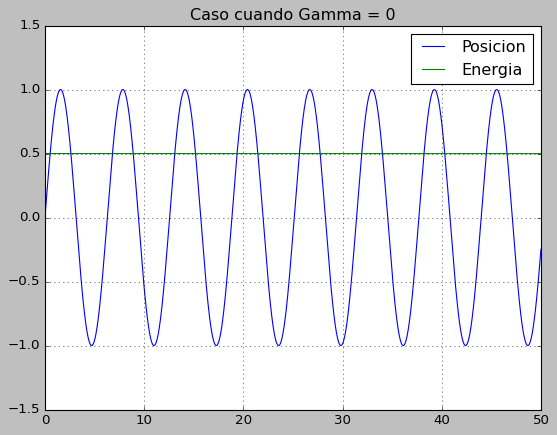

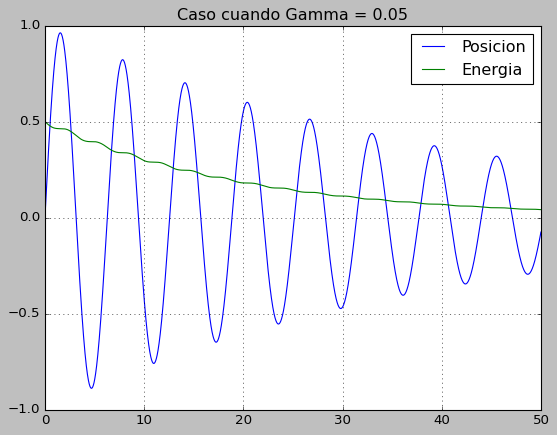

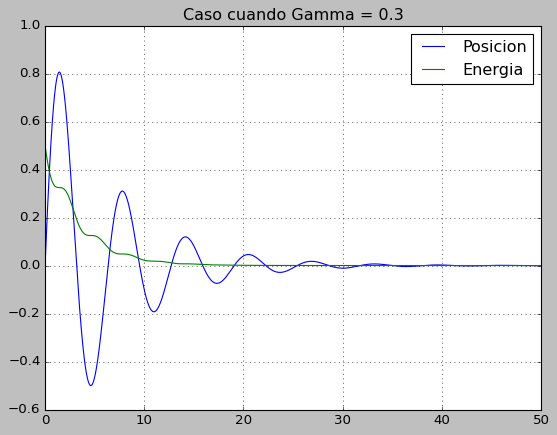

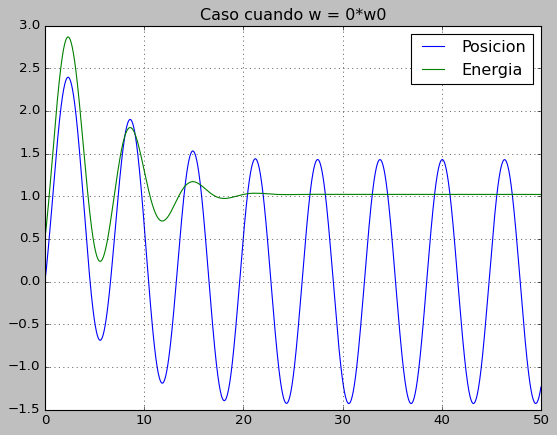

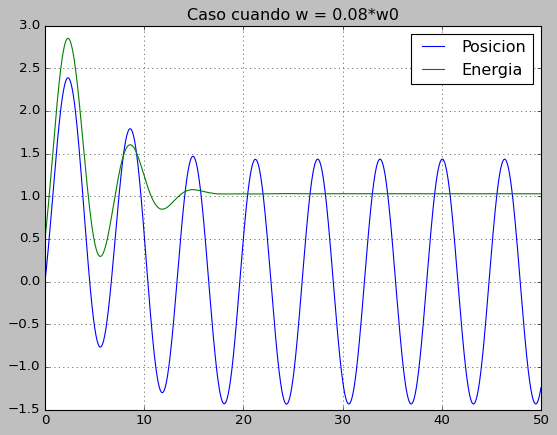

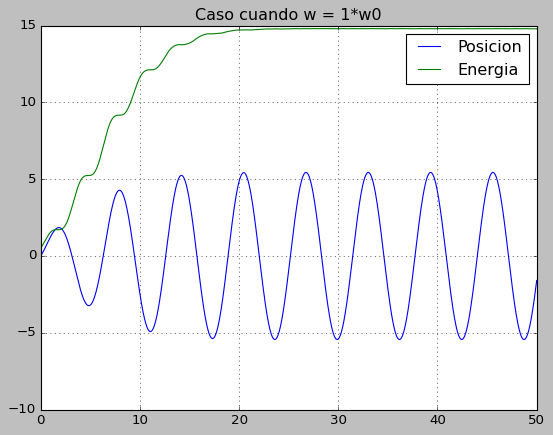

In [219]:
#Problema 6


y0 = np.array([0,1])
h = 0.01
t = np.arange(0 , 50+h , h)



def E(x , v , m = 1 , k = 1):
    return (1/2)*(m)*(v**2) + (1/2)*(k)*(x**2)


for G in [0 , 0.05 , 0.3]:

    def edo(t , funciones , F = 0 , gamma = G , k = 1 , m = 1):
        w0 = np.sqrt(k/m)
        x , v = funciones
        dxdt = v
        dvdt = (F/m) - gamma*v - x*(w0)**2
        return np.array([dxdt , dvdt])
    
    sol = solve_ivp(edo , (t[0] , t[-1]) , y0, t_eval = t )

    x = sol.y[0]
    v = sol.y[1]

    plt.title(f"Caso cuando Gamma = {G}")
    plt.plot(t , x , label="Posicion")
    plt.plot(t , E(x,v) , label="Energia")
    plt.grid()
    plt.legend()
    plt.show()


#-----------------------------------------------------------

F0 = 1
T = 10

for w in [0 , 0.08 , 1]:

    def edo(t , funciones , gamma = 0 , k = 1 , m = 1):
        w0 = np.sqrt(k/m)
        F = F0*np.cos(w0*w*t) * np.exp(-t**2 / T**2)
        x , v = funciones
        dxdt = v
        dvdt = (F/m) - gamma*v - x*(w0)**2
        return np.array([dxdt , dvdt])
    
    sol = solve_ivp(edo , (t[0] , t[-1]) , y0, t_eval = t )

    x = sol.y[0]
    v = sol.y[1]

    plt.title(f"Caso cuando w = {w}*w0")
    plt.plot(t , x , label="Posicion")
    plt.plot(t , E(x,v) , label="Energia")
    plt.grid()
    plt.legend()
    plt.show()

# 7.
El **problema restringido de tres cuerpos** describe el movimiento de una partícula de masa despreciable bajo la influencia gravitacional de dos cuerpos masivos $m_1$ y $m_2$, que orbitan en trayectorias circulares alrededor de su centro de masa. 

Definimos el parámetro de masa $\mu$ como:
$$
\mu \equiv \frac{m_2}{m_1 + m_2}, \quad \text{con} \quad 0 < \mu \leq \frac{1}{2}
$$

Si tomamos un **sistema de referencia rotante** con velocidad angular $\omega$, cuyo origen está en el centro de masa del sistema y que gira con la misma velocidad angular que los cuerpos principales, el **potencial efectivo** $U$ puede escribirse como:
$$
U = -\frac{\mu}{r_1} - \frac{1-\mu}{r_2} - \frac{1}{2} \omega^2 (x^2 + y^2)
$$
donde $r_1$ y $r_2$ son las distancias del cuerpo de prueba a $m_1$ y $m_2$ respectivamente:
$$
r_1 = \sqrt{(x + \mu)^2 + y^2}, \quad r_2 = \sqrt{(x - 1 + \mu)^2 + y^2}
$$

Las ecuaciones de movimiento de la partícula testigo son:
$$
\ddot{x} - 2\omega \dot{y} = \frac{\partial U}{\partial x}, \quad  
\ddot{y} + 2\omega \dot{x} = \frac{\partial U}{\partial y},
$$

En un sistema de coordenadas adimensionales donde la distancia entre los cuerpos principales es 1 y $\omega^2 = 1$, existen cinco **puntos de Lagrange** $(L_1, L_2, L_3, L_4, L_5)$ donde las fuerzas se equilibran.

Los **puntos triangulares** $L_4$ y $L_5$ forman un triángulo equilátero con los cuerpos principales. Si colocamos $m_1$ en $(-\mu,0)$ y $m_2$ en $(1-\mu,0)$ en el sistema rotante, las coordenadas de $L_4$ y $L_5$ son:  

$$
L_4 = \left( \frac{1}{2} - \mu, \frac{\sqrt{3}}{2} \right), \quad  
L_5 = \left( \frac{1}{2} - \mu, -\frac{\sqrt{3}}{2} \right).
$$

Dado que estos puntos forman un triángulo equilátero con los cuerpos masivos, se cumple que la partícula testigo está a la misma distancia de ambos cuerpos:  

$$
r_1 = r_2.
$$


Para estudiar la estabilidad de $L_4$ y $L_5$, introducimos **pequeñas perturbaciones**. Por ejemplo, alrededor de $L_4$:  

$$
x = x_{L_4} + \xi, \quad y = y_{L_4} + \eta.
$$

Sustituyendo en las ecuaciones de movimiento y expandiendo el potencial efectivo en **serie de Taylor** hasta primer orden en $\xi$ y $\eta$, obtenemos el sistema de ecuaciones linealizado:  

$$
\frac{d}{dt}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix}  
= \mathbf{A}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix},
$$

donde la matriz **$\mathbf{A}$** tiene la forma:

$$
\mathbf{A} =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
a & 0 & b & 2\omega \\
0 & 0 & 0 & 1 \\
c & -2\omega & d & 0
\end{bmatrix}.
$$

Los coeficientes de la matriz $\mathbf{A}$ están dados por las **segundas derivadas parciales del potencial efectivo $U$** evaluadas en $L_4$:

$$
a = \frac{\partial^2 U}{\partial x^2} (L_4), \quad
b = \frac{\partial^2 U}{\partial x \partial y} (L_4),
$$

$$
c = \frac{\partial^2 U}{\partial y \partial x} (L_4), \quad
d = \frac{\partial^2 U}{\partial y^2} (L_4).
$$

Esto mismo se hace para $L_5$. Luego, la estabilidad de $L_4$ y $L_5$ se determina analizando los **valores propios** de la matriz $\mathbf{A}$. Para que estos puntos sean estables, las soluciones deben ser oscilatorias, es decir, los valores propios deben ser imaginarios puros y no contener componentes reales positivas.  

- Encuentre los valores propios de la matriz $\mathbf{A}$ y analice su estabilidad.
- Determine el valor crítico de $\mu_c$ que garantiza la estabilidad de $L_i$ con $i = 4, 5$ para esto varie $\mu$ y examine cuando los valores propios cambian de ser reales a ser complejos. Encuentre dicho valor y compare con el denominado **criterio de Routh** 
$$
\mu < \mu_c \approx 0.03852.
$$
- Finalmente, examine la estabilidad de $L_4$ y $L_5$ para el caso del Sol y la Tierra, o el Sol y Jupiter.

Valores propios para mu:
[-0.+0.96332j -0.-0.96332j  0.+0.26835j  0.-0.26835j]

Valor crítico mu_c: 0.00100


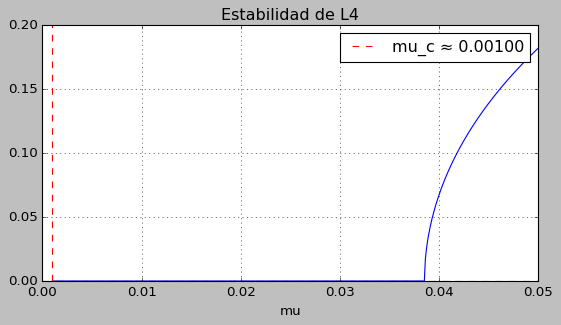


Estabilidad para Sol-Tierra:
Valores propios: [ 0.+0.99998987j  0.-0.99998987j -0.+0.00450004j -0.-0.00450004j]
Inestable

Estabilidad para Sol-Jupiter:
Valores propios: [-0.+0.99677079j -0.-0.99677079j  0.+0.08029934j  0.-0.08029934j]
Inestable


In [220]:
#Problema 7


def matriz_A(mu, omega=1):
    xL = 0.5 - mu
    yL = np.sqrt(3)/2
    r1 = np.sqrt((xL + mu)**2 + yL**2)
    r2 = np.sqrt((xL - 1 + mu)**2 + yL**2)
    a = 1 - (1-mu)/r2**3 - mu/r1**3 + 3*((1-mu)*(xL-1+mu)**2/r2**5 + mu*(xL+mu)**2/r1**5)
    b = 3*((1-mu)*(xL-1+mu)*yL/r2**5 + mu*(xL+mu)*yL/r1**5)
    c = b
    d = 1 - (1-mu)/r2**3 - mu/r1**3 + 3*((1-mu)*yL**2/r2**5 + mu*yL**2/r1**5)
    A = np.array([[0, 1, 0, 0],
                  [a, 0, b, 2*omega],
                  [0, 0, 0, 1],
                  [c, -2*omega, d, 0]])
    return A

#-----------------------------------------------------------------------------------------------

mu = 0.01
A = matriz_A(mu)
eigen = np.linalg.eigvals(A)
print("Valores propios para mu:")
print(np.round(eigen, 5))

mus = np.linspace(0.001, 0.05, 500)
PR = []
for mu in mus:
    A = matriz_A(mu)
    eigs = np.linalg.eigvals(A)
    PR.append(np.max(np.real(eigs)))

mu_ci = np.where(np.array(PR) > 0)[0][0]
mu_c = mus[mu_ci]
print(f"\nValor crítico mu_c: {mu_c:.5f}")

#-----------------------------------------------------------------------------------------------

plt.figure(figsize=(8,4))
plt.plot(mus, PR)
plt.axhline(0, color='k', linestyle='--')
plt.axvline(mu_c, color='r', linestyle='--', label=f"mu_c ≈ {mu_c:.5f}")
plt.xlabel("mu")
plt.title("Estabilidad de L4")
plt.legend()
plt.grid()
plt.show()

#-----------------------------------------------------------------------------------------------

mu_sol_tierra = 3e-6
A_tierra = matriz_A(mu_sol_tierra)
vp_tierra = np.linalg.eigvals(A_tierra)

mu_sol_jupiter = 9.5e-4
A_jupiter = matriz_A(mu_sol_jupiter)
vp_jupiter = np.linalg.eigvals(A_jupiter)

#-----------------------------------------------------------------------------------------------

print("\nEstabilidad para Sol-Tierra:")
print("Valores propios:", np.round(vp_tierra, 8))

if np.all(np.abs(np.real(vp_tierra))) < 1e-8:
  print("Estable")
else:
  print("Inestable")

print("\nEstabilidad para Sol-Jupiter:")
print("Valores propios:", np.round(vp_jupiter, 8))
if np.all(np.abs(np.real(vp_jupiter)))<1e-8:
  print("Estable")
else:
  print("Inestable")

# 8.

En la dinámica galáctica, el disco de una galaxia espiral puede presentar pequeñas perturbaciones que dan lugar a oscilaciones y ondas de densidad. Estas oscilaciones están gobernadas por la **ecuación de Jeans** en un disco delgado, que describe la evolución de perturbaciones en la densidad superficial $\Sigma(r,t)$ y la velocidad en presencia de la auto-gravitación del disco.  

Bajo la aproximación de pequeñas perturbaciones alrededor de un estado de equilibrio, las ecuaciones hidrodinámicas del sistema conducen a la ecuación diferencial:  

$$
\frac{d^2 \Sigma}{dt^2} + \kappa^2 \Sigma = 0,
$$

donde $\kappa$ es la **frecuencia de epicíclo**, que depende de la rotación del disco y describe la oscilación de una partícula en el plano del disco bajo pequeñas desviaciones de su órbita circular.  Muchas galaxias espirales presentan una curva de rotación aproximadamente **plana** a grandes radios, es decir, la velocidad de rotación $V(r)$ es aproximadamente constante:

$$
V(r) \approx V_0.
$$

En este caso, la frecuencia de epicíclo se puede aproximar como:

$$
\kappa \approx \sqrt{2} \Omega,
$$

donde:

$$
\Omega = \frac{V_0}{r}.
$$

- Graficar la evolución temporal de $\Sigma(t)$.  
- Calcular los valores propios de la matriz del sistema y discutir su relación con la estabilidad del disco.  
- Comparar los resultados numéricos con la solución analítica de la ecuación diferencial.  
$$
\Sigma(t)=\Sigma(0)\cos{\kappa t}+\frac{\dot{\Sigma(0)}}{\kappa}\sin{\kappa t}
$$
- Analizar cómo cambia la estabilidad del sistema al modificar $\kappa$.  


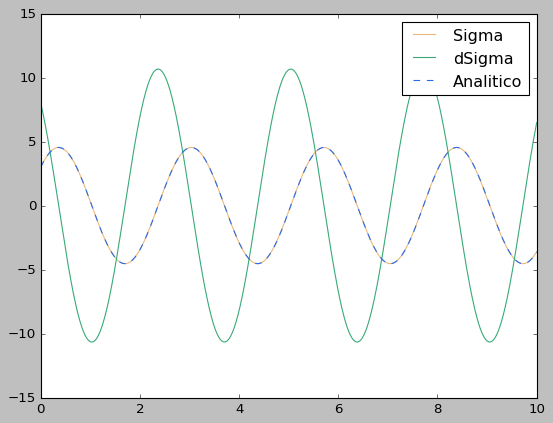

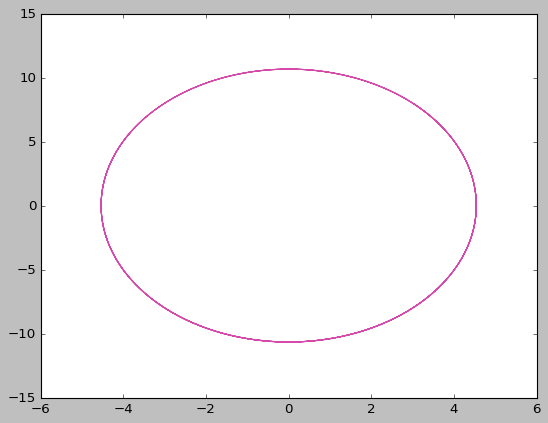

[0.+2.34860467j 0.-2.34860467j]
Su frecuencia aumenta demasiado, se vuelve inestable


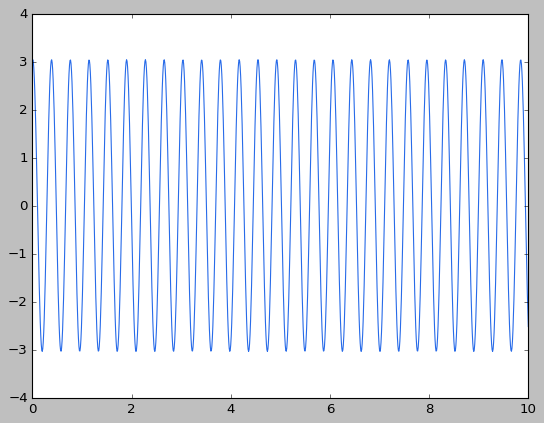

In [221]:
#Problema 8
r=np.random.randint(0,100)  
v0=np.random.randint(0,100)

k = np.sqrt(2) * v0/r
def edo( t , funciones):
  sigma , vel = funciones
  dsdt = vel
  dvdt = -(k**2)*sigma
  return np.array([dsdt , dvdt])

Y0=np.random.randint(0,10,size=(2)) #Condiciones iniciales 

h = 0.01

t =np.arange(0 , 10 + h , h )

sol = solve_ivp(edo,(t[0],t[-1]),y0=Y0,t_eval=t)
Analitica = Y0[0] * np.cos(k*t) + (Y0[1]/k) * np.sin(k*t) 

#-----------------------------------------------------------------------------------------------

plt.plot(t , sol.y[0], color="#ECB87C", label="Sigma")
plt.plot(t,sol.y[1], color="#39AA77", label="dSigma")
plt.plot(t , Analitica , color="#286BE9",ls = "--", label="Analitico")

plt.legend()
plt.show()

plt.plot(sol.y[0], sol.y[1] , c="#D449AA")
plt.show()

#-----------------------------------------------------------------------------------------------

A = np.array([[0,1],[-k**2,0]])

valores_propios=la.eig(A)[0]
print(valores_propios)

#--------------------------------------------------------------------

k = 10 * v0/r
Analitica = Y0[0] * np.cos(k*t) + (Y0[1]/k) * np.sin(k*t)
plt.plot(t , Analitica , color="#286BE9", label="Analitico")

print("Su frecuencia aumenta demasiado, se vuelve inestable")

# 9.
El método *Leapfrog* (o salto de rana) es un algoritmo numérico de segundo orden utilizado para integrar ecuaciones diferenciales ordinarias, especialmente en problemas de mecánica clásica donde se conserva la energía. Este método es particularmente útil para sistemas Hamiltonianos.

Considere la siguiente ecuación diferencial de segundo orden:
$$
\frac{d^2 x}{dt^2} = f(x),
$$
la cual puede descomponerse en un sistema acoplado de ecuaciones de primer orden:
$$
\frac{dx}{dt} = v, \quad \frac{dv}{dt} = f(x).
$$

El método Leapfrog actualiza las variables en pasos intercalados de tiempo ($\Delta t$) mediante las siguientes fórmulas:
$$
v_{n+1/2} = v_{n-1/2} + f(x_n) \Delta t,
$$
$$
x_{n+1} = x_n + v_{n+1/2} \Delta t.
$$

Escriba un programa en Python que utilice el método Leapfrog para resolver el problema del oscilador armónico, donde $f(x) = -\omega^2 x$ con $\omega = 2$ rad/s. Use condiciones iniciales $x(0) = 1$ y $v(0) = 0$, y un paso de tiempo $\Delta t = 0.01$ s en el intervalo $t \in [0, 10]$ s.

**Nota:** La siguiente relación puede ser útil
$$
v_{n+1/2}=v_{n}+\frac{1}{2}f(x_{n})\Delta t
$$

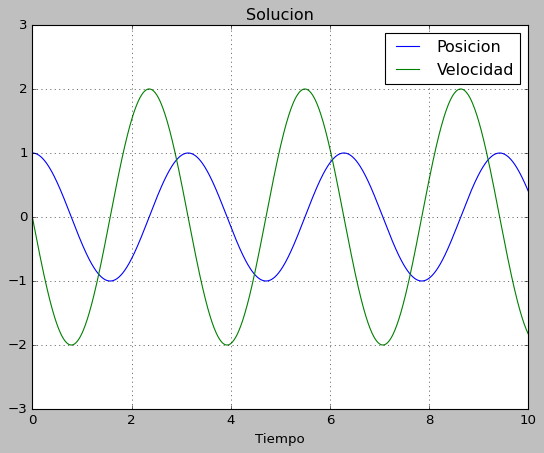

In [222]:
#Problema 9

w = 2
h = 0.01
t = np.arange(0 , 10 + h, h )

xo = 1
vo = 0

Y0 = np.array([xo,vo])
def edo(t , funciones):
  x , v = funciones
  dxdt = v
  dvdt = -(w**2)*x
  return np.array([dxdt , dvdt])

sol = solve_ivp( edo , (t[0] , t[-1]) , Y0 , t_eval=t)

#-----------------------------------------------------------------------------------------------

plt.title("Solucion")
plt.xlabel("Tiempo")
plt.plot(t , sol.y[0] , label="Posicion")
plt.plot(t , sol.y[1] , label="Velocidad")
plt.legend()
plt.grid()
plt.show()